# Experiment: Fit Prev Trial Not Started

**Goal**: Determine if a binary encoding of the previous trial not being started (i.e. "timeout trial") predicts L/R/V



Related notebooks:

* `2024_02_20_dev_trial_not_started.ipynb`

## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorFilteredHistory
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [3]:
model_config = {
    "prev_trial_not_started": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau,
        "design_matrix_generator_args": {
            "trial_not_started": "prev",
        },
    }
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
}

save_name = "2024_02_20_fit_prev_trial_not_started.pkl"

## Run

In [19]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<
Evaluating trial_not_started prev

 ***** evaluating model prev_trial_not_started w/ sigma 0.07 *****
         Current function value: 64748.713861
         Iterations: 25
         Function evaluations: 90
         Gradient evaluations: 78

 ***** evaluating model prev_trial_not_started w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64426.218111
         Iterations: 29
         Function evaluations: 43
         Gradient evaluations: 43

 ***** evaluating model prev_trial_not_started w/ sigma 0.25 *****
         Current function value: 64295.523710
         Iterations: 27
         Function evaluations: 66
         Gradient evaluations: 55

 ***** evaluating model prev_trial_not_started w/ sigma 0.5 *****
      

## Visualize

In [4]:
experiment = load_experiment(save_name)
palette = "Set2"

mv = ModelVisualizer(experiment)

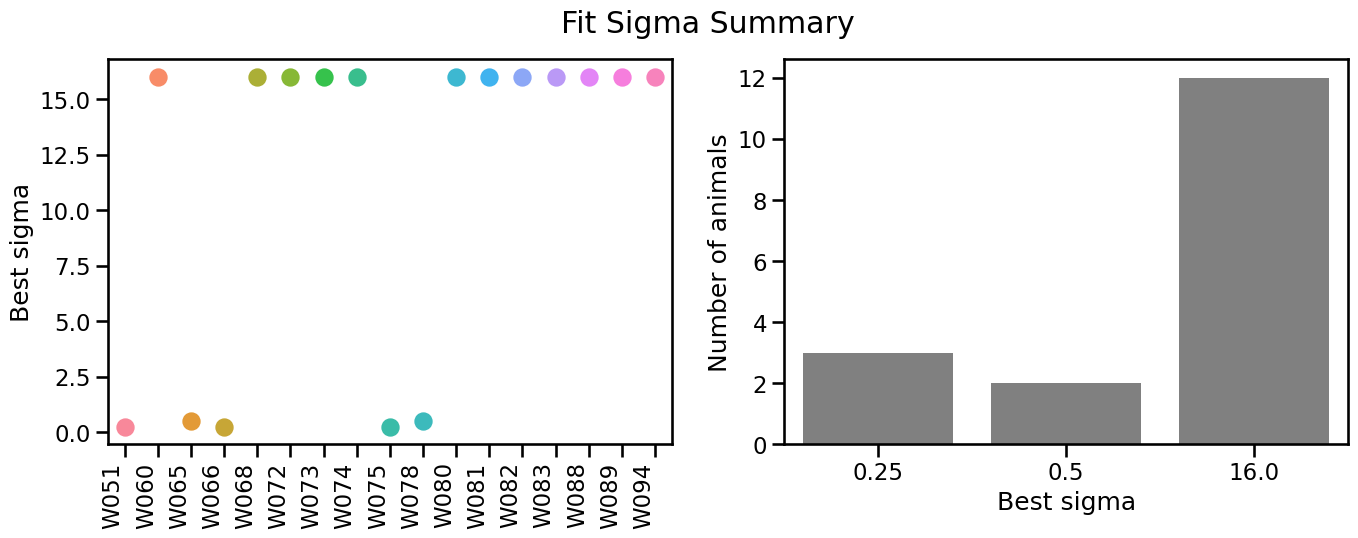

In [27]:
mv.plot_sigma_summary()

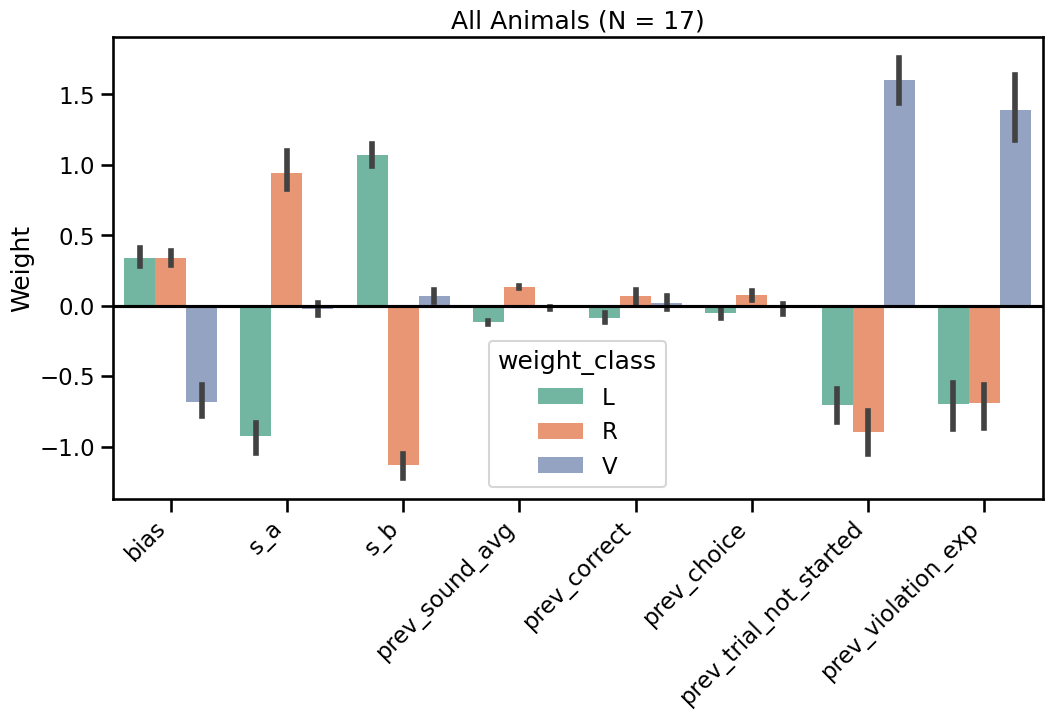

In [28]:
mv.plot_weights_summary(palette=palette)


(-1.5, 2.5)

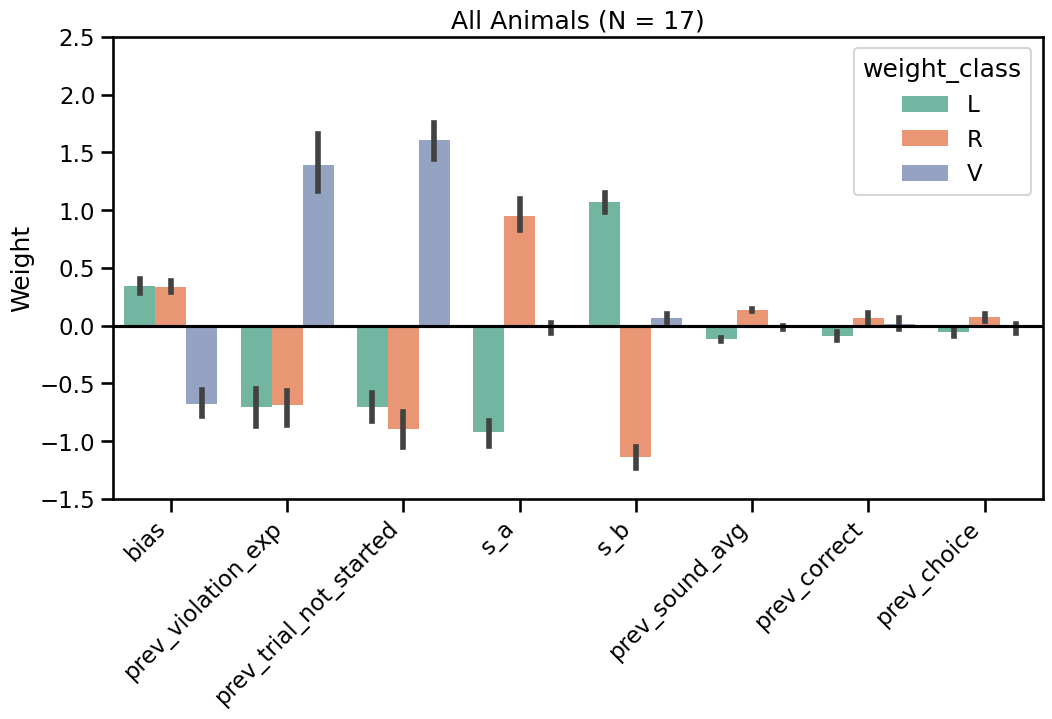

In [8]:
mv.plot_weights_summary(
    palette=palette,
    order=[
        "bias",
        "prev_violation_exp",
        "prev_trial_not_started",
        "s_a",
        "s_b",
        "prev_sound_avg",
        "prev_correct",
        "prev_choice",
    ],
)
plt.ylim(-1.5, 2.5)

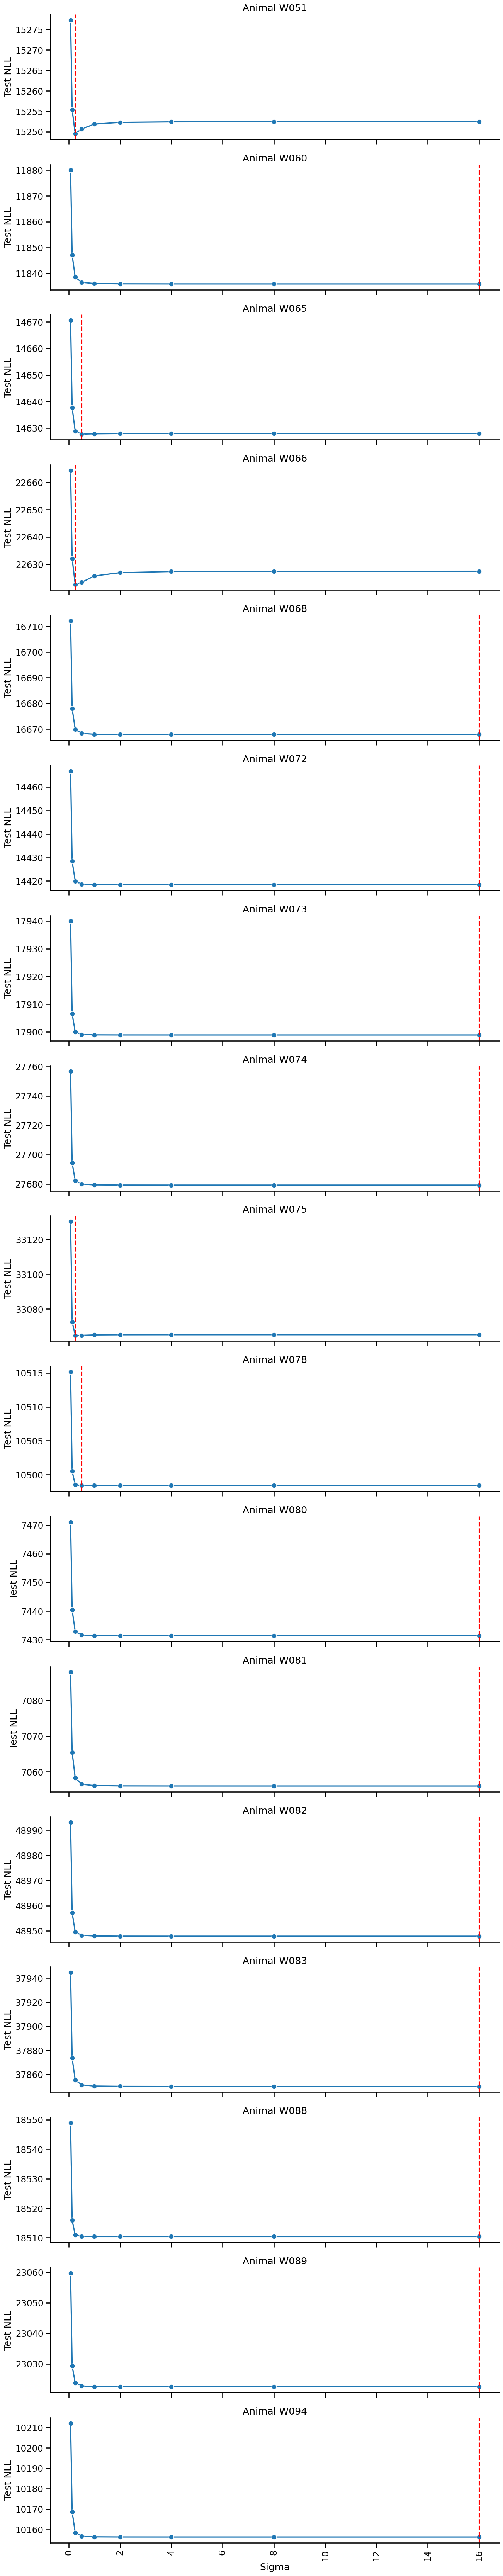

In [23]:
mv.plot_nll_over_sigmas_by_animal()

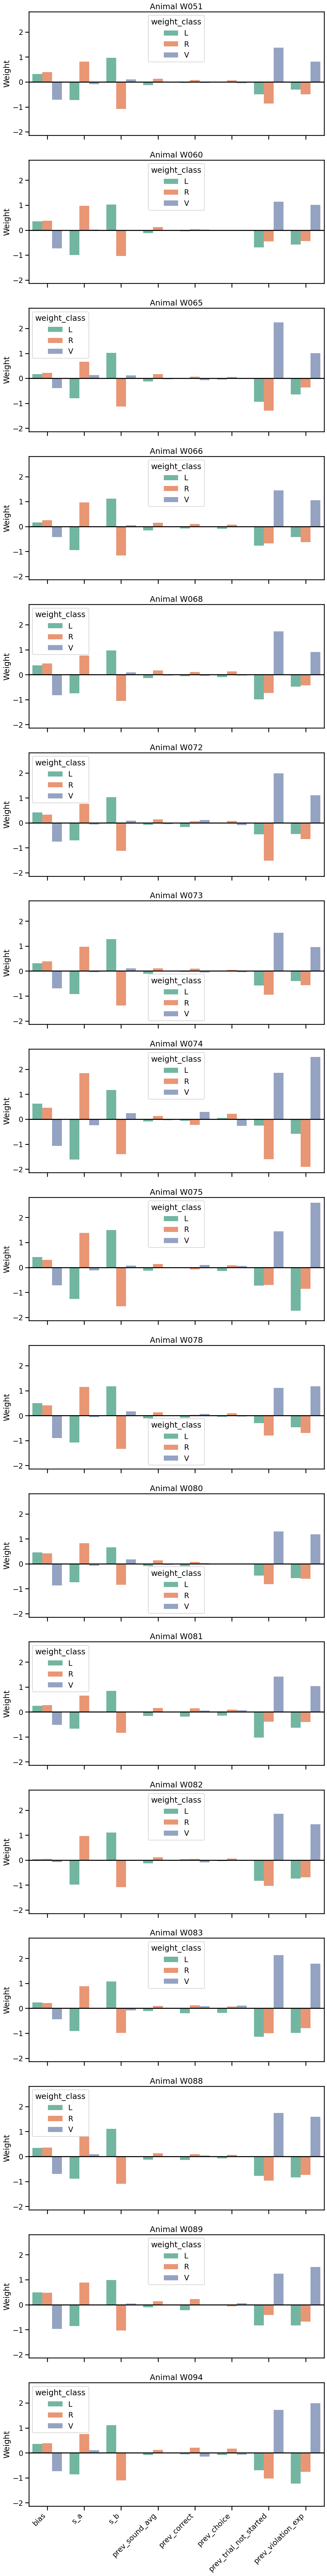

In [24]:
mv.plot_weights_by_animal(palette=palette)